method_Logistic:match: 33/39
method_SVM:match: 32/39
the most important feature:D2
method_SVC:match: 28/39
method_SVC_optimization:match: 34/39


Text(0,0.5,'gamma')

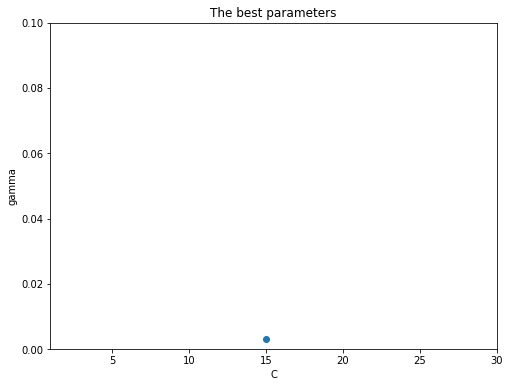

In [7]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV  # high level的参数搜索加交叉验证模块
from sklearn.svm import SVC

#读取数据划分训练集测试集
data = pd.read_csv('parkinsons.data')
y=data['status'].values
data=data.drop(labels='status',axis=1)
data=data.drop(labels='name',axis=1)
x=data.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#使用Logistics分类器
model = LogisticRegression(penalty='l1')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('method_Logistic:match: {0}/{1}'.format(np.sum(np.equal(y_pred,y_test)),y_test.shape[0]))

#使用SVM训练分类器
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
beta = model.coef_[0,:]
beta=beta.tolist()
num=max(beta)
index=beta.index(num)
feature=data.columns.values.tolist()
print('method_SVM:match: {0}/{1}'.format(np.sum(np.equal(y_pred,y_test)),y_test.shape[0]))
print('the most important feature:{}'.format(feature[index]))

clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('method_SVC:match: {0}/{1}'.format(np.sum(np.equal(y_pred,y_test)),y_test.shape[0]))

#搜索最佳的参数
gammas = np.logspace(-5, 1, 30)
param_grid = {'gamma': gammas,'C': np.arange(2, 30)}
clf = GridSearchCV(SVC(), param_grid, cv=4, return_train_score=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('method_SVC_optimization:match: {0}/{1}'.format(np.sum(np.equal(y_pred,y_test)),y_test.shape[0]))
param=clf.best_params_
fig = plt.figure(1, figsize=(8, 6))
plt.title('The best parameters')
plt.xlim(1, 30)
plt.ylim(0.0001, 0.1)
plt.scatter(param['C'],param['gamma'])
plt.xlabel('C')
plt.ylabel('gamma')

# T2-1

### 结果

程序中print了二分类匹配的正确率，对这个问题，正确率已经可以很好地评价分类器模型的性能。可以看出，在相同训练集测试集划分的情况下，两种方法的正确率非常接近，说明在这个问题上，LR分类和线性SVM分类的表现是接近的。

### 分析

我觉得，使用线性核函数的SVM分类器和LR分类没有本质区别，训练结果都可以说是决策树。这个问题具有良好的线性可分性，所以使用线性核函数已经可以得到比较良好的结果。



# T2-2

### 结果

直接输出SVM训练模型中各项的权重，比较重要的几项有第20、9、15项，分别对应D2、MDVP：shimmer(dB)、HNR，最重要的影响项是D2

### 分析

注意到第8、9项其实是一个参量（MDVP:shimmer）,只不过一个用的是原值另一个用的是dB数，起初我觉得8、9项只有一个有权重是非常奇怪的，不过后来想明白了：用线性核函数衡量的是线性相关程度，显然最终分类结果与MDVP：shimmer有关，但是只和其dB数线性相关，而这个参量本身的指数相关性在线性模型下无法体现，故而权重为零。

# T2-3

### 分析

我首先考虑如何确定惩罚系数C和核函数参数gamma的范围，因为gamma太小或者C太大都容易导致过拟合，使得最终在测试集上的表现反而不好。故而我使用了助教在例程中给出的gamma初始参数的分布，并将C定义在1到30之间寻找一个整数值。、

由于划分训练集的时候，我取了总数据集的五分之一做测试集，相应第，训练参数的时候使用4折交叉验证，取cv=4。

### 尝试

尝试修正gamma的初始尝试值，修正参数为（--10,1,30），发现结果无明显变化，将生成项数增加到100项也无明显意义。分析可能是因为太小的gamma容易导致过拟合，而30项已经足够了，过于精细的参数确定对于模型最终在测试集上的表现没有明显的帮助。

### 结果

如图-The best parameter所示，最终C大概在15左右（有时会是2~4，与训练集的划分有关），gamma约在10^-3左右。相比于直接使用SVC，其结果要好上不少。

|     method      | match |
| :-------------: | :---: |
|       LR        | 33/39 |
|   SVM(linear)   | 32/39 |
|       SVC       | 28/39 |
| SVC(param_opti) | 34/39 |

